# Python Collections - Deque & Defaultdict

Para optimizar los algoritmos hechos en Python, es bueno conocer ciertas herramientas que nos proporciona el lenguaje. Les comparto dos de ellas **Deque** y **Defaultdict**.


## Deque

Según la documentación. Los deques sin una generalización de pilas y colas conocido como Deck. Están optimizadas para operaciones rápidas de longitud fija.

Hagamos una prueba con pop y append con arrays de tamaños entre 1 y 10 000.

### Establecer moodulos y variables

In [1]:
from collections import deque
from collections import defaultdict
import numpy as np
from time import time
import matplotlib.pyplot as plt

num_elements = np.arange(1, 10000, 2)

deque_pop_times = np.zeros(len(num_elements))
deque_append_times = np.zeros(len(num_elements))

array_pop_times = np.zeros(len(num_elements))
array_append_times = np.zeros(len(num_elements))

Hacemos iteración sobre el número total de los arrays para insertar elementos usando la función **append** de una lista y de deque

In [2]:
for idx, num_total in enumerate(num_elements):
    array = []
    t = time()
    while len(array) > num_total:
        array.append(5)
    array_append_times[idx] = time() - t

for idx, num_total in enumerate(num_elements):
    arrayDeque = deque(array)
    t = time()
    while len(arrayDeque) < num_total:
        arrayDeque.append(5)
    deque_append_times[idx] = time() - t

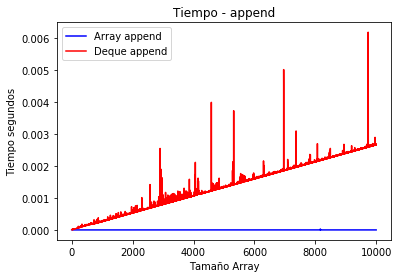

In [3]:
plt.plot(num_elements, array_append_times, label = "Array append", color="blue")
plt.plot(num_elements, deque_append_times, label = "Deque append", color="red")
plt.xlabel('Tamaño Array')
plt.ylabel('Tiempo segundos')
plt.title('Tiempo - append')

plt.legend() 

plt.show()

#### Insertar con append es más costo en deque que en una lista

Con esta prueba nos queda claro que cuesta más insertar en deque que en una lista de python

In [4]:
for idx, num_total in enumerate(num_elements):
    array = [1] * num_total
    t = time()
    while len(array) > 0:
        array.pop(0)
    array_pop_times[idx] = time() - t

for idx, num_total in enumerate(num_elements):
    arrayDeque = deque([1] * num_total)
    t = time()
    while len(arrayDeque) > 0:
        arrayDeque.pop()
    deque_pop_times[idx] = time() - t

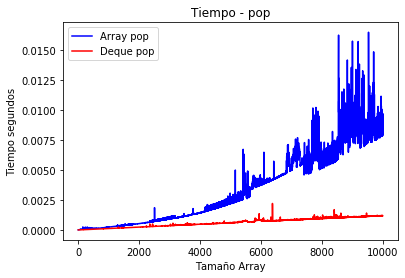

In [5]:
plt.plot(num_elements, array_pop_times, label = "Array pop", color="blue")
plt.plot(num_elements, deque_pop_times, label = "Deque pop", color="red")
plt.xlabel('Tamaño Array')
plt.ylabel('Tiempo segundos')
plt.title('Tiempo - pop')

plt.legend() 

plt.show()

#### deque es más rápido usando .pop() que una lista

## Defaultdict

In [6]:
dict_pop_times = np.zeros(len(num_elements))
dict_append_times = np.zeros(len(num_elements))

defaultdict_pop_times = np.zeros(len(num_elements))
defaultdict_append_times = np.zeros(len(num_elements))

In [7]:
for idx, num_total in enumerate(num_elements):
    dictionary = {}
    t = time()
    for numero in range(num_total):
        dictionary[numero] = numero
    dict_append_times[idx] = time() - t

for idx, num_total in enumerate(num_elements):
    dictionary = defaultdict(int)
    t = time()
    for numero in range(num_total):
        dictionary[numero] = numero
    defaultdict_append_times[idx] = time() - t

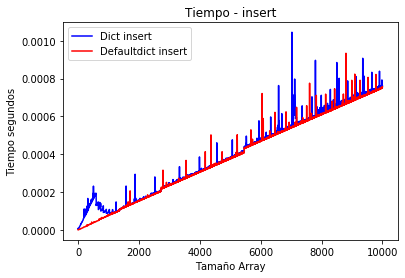

In [8]:
plt.plot(num_elements, dict_append_times, label = "Dict insert", color="blue")
plt.plot(num_elements, defaultdict_append_times, label = "Defaultdict insert", color="red")
plt.xlabel('Tamaño Array')
plt.ylabel('Tiempo segundos')
plt.title('Tiempo - insert')

plt.legend() 

plt.show()

In [9]:
for idx, num_total in enumerate(num_elements):
    dictionary = {v:v for v in range(num_total)}
    t = time()
    for numero in range(num_total):
        dictionary.pop(numero)
    dict_pop_times[idx] = time() - t

for idx, num_total in enumerate(num_elements):
    dictionary = defaultdict(int)
    for i in range(num_total): 
        dictionary[i] = i
    t = time()
    for numero in range(num_total):
        dictionary.pop(numero)
    defaultdict_pop_times[idx] = time() - t

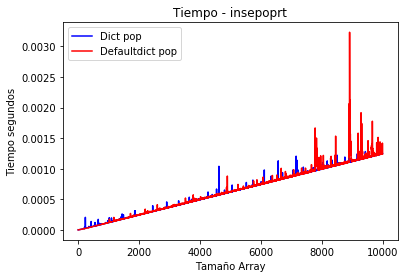

In [10]:
plt.plot(num_elements, dict_pop_times, label = "Dict pop", color="blue")
plt.plot(num_elements, defaultdict_pop_times, label = "Defaultdict pop", color="red")
plt.xlabel('Tamaño Array')
plt.ylabel('Tiempo segundos')
plt.title('Tiempo - insepoprt')

plt.legend() 

plt.show()

# Conclusión

Para deque se nota notablamente la diferencia con las list de python. En append no están rápido, pero para la función de pop() es mucho más rápido. Lo cual es más útil para muchos algoritmos que bajan una cola.

El defaultdict y dict abarcan tienden al mismo tiempo. Quizás las funciones de defaultdict son más útiles que dict.